# Translated Assessment

### Read the csv dataset using pandas

In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression




In [312]:
# reading CSV file
data = read_csv("Desktop/Bank Customer Churn Prediction.csv")

### Display columns. The head() method returns the first 5 rows if a number is not specified


In [313]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### DataSet stats

before looking at some statistics, check if there are null values

In [314]:
data.isnull()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False


In [315]:
print("Number of rows: ",len(data))
print("Number of columns: ", len(data.columns))
print("Avarage of Customers' ages: ", data["age"].mean())
print("Avarage of Customers' credit cards: ", data["credit_card"].mean())
print("Number of Male and number of Female:\n", data["gender"].value_counts())




Number of rows:  10000
Number of columns:  12
Avarage of Customers' ages:  38.9218
Avarage of Customers' credit cards:  0.7055
Number of Male and number of Female:
 Male      5457
Female    4543
Name: gender, dtype: int64


## Drop
dropping customer_id and gender columns because they are irrilevant for the prediction

In [316]:
X = data.drop(['customer_id','gender','churn'], axis = 1)
X.head()

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,42,2,0.00,1,1,1,101348.88
1,608,Spain,41,1,83807.86,1,0,1,112542.58
2,502,France,42,8,159660.80,3,1,0,113931.57
3,699,France,39,1,0.00,2,0,0,93826.63
4,850,Spain,43,2,125510.82,1,1,1,79084.10


## Data graphics
draw some graphics to show the data distribution

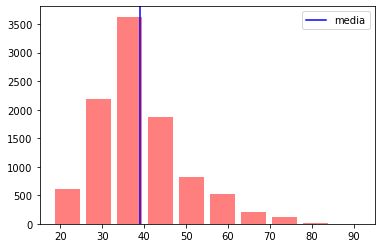

In [317]:
fig, ax = plt.subplots()
ax.hist(data['age'],color='red', alpha = 0.5, rwidth = 0.8)
ax.axvline(data["age"].mean(), color='blue', linestyle='-',label="media")
ax.legend();


This graphic shows the age values distribution and the avarage

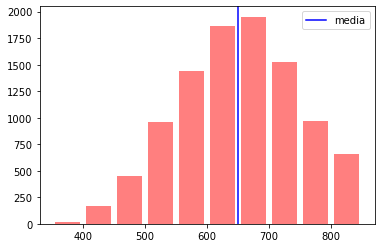

In [318]:
fig, ax = plt.subplots()
ax.hist(data['credit_score'],color='red', alpha = 0.5, rwidth = 0.8)
ax.axvline(data["credit_score"].mean(), color='blue', linestyle='-',label="media")
ax.legend();

This graphic shows the credit_score values distribution and the avarage

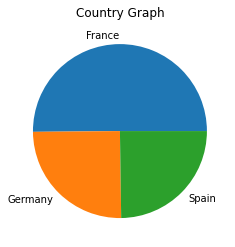

In [319]:
count = pd.Series(data['country']).value_counts()
values = count.values.tolist()
etichette = count.index.tolist()

plt.pie(values, labels=etichette)
plt.title('Country Graph')
plt.show()

This graphic shows the country of customers distribution

## Train and Test Sets creation

Use the pd.get_dummies() function before the splitting of the data set to perform one-hot encoding on the categorical variable, which creates binary columns for each unique category.

By applying one-hot encoding, the categorical variable 'country' is transformed into multiple binary columns that can be used as input for the machine learning model.

In [320]:
y = data['churn']
X_encoded = pd.get_dummies(X)
trainSet, testSet, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


trainSet.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
9069,619,32,4,175406.13,2,1,1,172792.43,0,0,1
2603,643,34,7,160426.07,1,0,1,188533.11,0,1,0
7738,561,33,6,0.00,2,0,0,173680.39,1,0,0
1579,618,41,8,37702.79,1,1,1,195775.48,0,1,0
5058,714,37,9,148466.93,2,0,1,151280.96,1,0,0


In [321]:
len(trainSet)

7000

In [322]:
testSet.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
6252,596,32,3,96709.07,2,0,0,41788.37,0,1,0
4684,623,43,1,0.00,2,1,1,146379.30,1,0,0
1731,601,44,4,0.00,2,1,0,58561.31,0,0,1
4742,506,59,8,119152.10,2,1,1,170679.74,0,1,0
4521,560,27,7,124995.98,1,1,1,114669.79,0,0,1


In [323]:
len(testSet)

3000

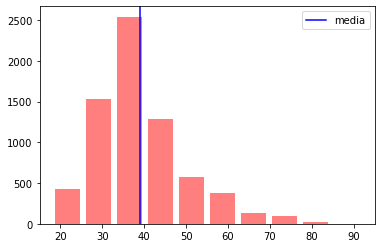

In [325]:
fig, ax = plt.subplots()
ax.hist(trainSet['age'],color='red', alpha = 0.5, rwidth = 0.8)
ax.axvline(trainSet["age"].mean(), color='blue', linestyle='-',label="media")
ax.legend();

## Train a Machine Learning model to predict if a customer is going to churn.


### RandomForestClassifier model

In [326]:
model = RandomForestClassifier()
model.fit(trainSet, y_train)

# Make predictions on the test set
y_pred = model.predict(testSet)

accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Model accuracy: 0.8716666666666667
Precision: 0.7741046831955923
Recall: 0.4811643835616438
F1 score: 0.5934530095036958


Text(0.5, 15.0, 'Predicted Churn')

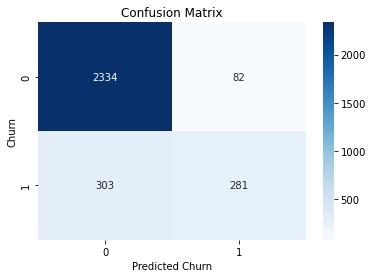

In [327]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'Blues', fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Churn')
plt.xlabel('Predicted Churn')

### LogisticRegression model

In [328]:
m = LogisticRegression(solver = 'liblinear')

m.fit(trainSet, y_train)

pred = m.predict(testSet)

acc = accuracy_score(pred, y_test)
prec = precision_score(y_test, pred)
f1 = f1_score(pred, y_test)
rec = recall_score(pred, y_test)

print("Model accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)

Model accuracy: 0.8
Precision: 0.43548387096774194
Recall: 0.43548387096774194
F1 score: 0.15254237288135594


Text(0.5, 15.0, 'Predicted Churn')

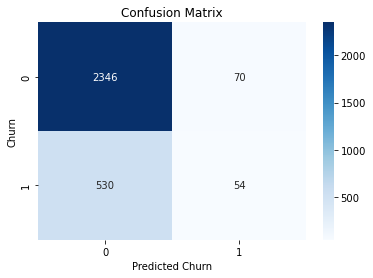

In [329]:

conf_matrix = metrics.confusion_matrix(y_test, pred)
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'Blues', fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Churn')
plt.xlabel('Predicted Churn')

## Metrics
### Accuracy: 
Accuracy measures the proportion of correctly classified instances out of the total instances. It is calculated as (true positives + true negatives) divided by (true positives + true negatives + false positives + false negatives). Accuracy is a widely used metric when classes are balanced. However, it may not be suitable for imbalanced datasets.
### Precision: 
Precision measures the proportion of correctly predicted positive instances (true positives) out of the total instances predicted as positive (true positives + false positives). Precision provides insights into the model's ability to avoid false positives.
### Recall: 
Recall measures the proportion of correctly predicted positive instances (true positives) out of the total actual positive instances (true positives + false negatives). Recall provides insights into the model's ability to identify all positive instances.
### F1 score: 
The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of precision and recall. The F1 score is useful when you want to consider both precision and recall simultaneously.